In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train = train.dropna(how = 'all')

In [5]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
# sex_mapping = {'male':0,
#                'female': 1}
# # embarked_mapping = {'C': 0,
# #                     'Q': 1,
# #                     'S': 2}
# train['Sex'] = train['Sex'].map(sex_mapping)
# # train['Embarked'] = train['Embarked'].map(embarked_mapping)
# train.head()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.loc[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [10]:
train.loc[train['Ticket'] == '239853']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S


In [11]:
train[train['Ticket'] == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [12]:
train['Ticket'][179] = '0'
train['Ticket'][271] = '0'
train['Ticket'][302] = '0'
train['Ticket'][597] = '0'

C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\622506302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket'][179] = '0'
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\622506302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket'][271] = '0'
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\622506302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket'][302] = '0'
C:\Users\ishan\AppData

In [13]:
train['Fare'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [14]:
train['Ticket'].unique

<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
train['Tick_num']=train['Ticket'].str.split(" ")

In [17]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tick_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[A/5, 21171]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[PC, 17599]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[STON/O2., 3101282]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,[113803]
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,[373450]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,[211536]
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,[112053]
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[W./C., 6607]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,[111369]


In [18]:
train['Ticket_Number'] = train['Ticket'].str.split(" ")

In [19]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tick_num,Ticket_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[A/5, 21171]","[A/5, 21171]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[PC, 17599]","[PC, 17599]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[STON/O2., 3101282]","[STON/O2., 3101282]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,[113803],[113803]
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,[373450],[373450]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,[211536],[211536]
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,[112053],[112053]
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[W./C., 6607]","[W./C., 6607]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,[111369],[111369]


In [20]:
for i in range(len(train)):
    if len(train['Tick_num'][i]) == 1:
        train['Ticket_Number'][i] = train['Tick_num'][i][0]
    else:
        train['Ticket_Number'][i] = train['Tick_num'][i][1]
    

C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\212057049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket_Number'][i] = train['Tick_num'][i][1]
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\212057049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket_Number'][i] = train['Tick_num'][i][1]
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\212057049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [21]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tick_num,Ticket_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[A/5, 21171]",21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[PC, 17599]",17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[STON/O2., 3101282]",3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,[113803],113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,[373450],373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,[211536],211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,[112053],112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"[W./C., 6607]",6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,[111369],111369


In [22]:
train['Ticket_Number'][115] = '3101294'
train['Ticket_Number'][173] = '3101280'
#train['Tiket__Nmber'][242] = '3101275'
train['Ticket_Number'][243] = '3101275'
train['Ticket_Number'][382] = '3101293'
train['Ticket_Number'][400] = '3101289'
train['Ticket_Number'][414] = '3101269'
train['Ticket_Number'][433] = '3101274'
train['Ticket_Number'][473] = '0'
train['Ticket_Number'][579] = '3101286'
train['Ticket_Number'][590] = '3101273'
train['Ticket_Number'][636] = '3101292'
train['Ticket_Number'][664] = '3101285'
train['Ticket_Number'][744] = '3101288'

C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\2852671191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket_Number'][115] = '3101294'
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\2852671191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket_Number'][173] = '3101280'
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\2852671191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Ticket_Number

In [23]:
pd.to_numeric(train['Ticket_Number'], downcast = 'integer')
train['Ticket_Number'] = train['Ticket_Number'].astype(int)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Tick_num       891 non-null    object 
 13  Ticket_Number  891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 94.1+ KB


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tick_num,Ticket_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[A/5, 21171]",21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[PC, 17599]",17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[STON/O2., 3101282]",3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,[113803],113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,[373450],373450


In [26]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test['Ticket_number'] = test['Ticket'].str.split(" ")
test['Tik_num'] = test['Ticket'].str.split(" ")
for i in range(len(test)):
    if len(test['Tik_num'][i]) == 1:
        test['Ticket_number'][i] = test['Tik_num'][i][0]
    else:
        test['Ticket_number'][i] = test['Tik_num'][i][1]
        
test['Ticket_number'][45] = '3101291'
test['Ticket_number'][97] = '3101268'
test['Ticket_number'][268] = '39186'

pd.to_numeric(test['Ticket_number'], downcast="integer")
test['Ticket_number'] = test['Ticket_number'].astype(int)



C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\1087444227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Ticket_number'][i] = test['Tik_num'][i][0]
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\1087444227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Ticket_number'][i] = test['Tik_num'][i][0]
C:\Users\ishan\AppData\Local\Temp\ipykernel_14712\1087444227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te

In [28]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Tik_num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,330911,[330911]
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,363272,[363272]
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,240276,[240276]
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,315154,[315154]
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3101298,[3101298]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,3236,"[A.5., 3236]"
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,17758,"[PC, 17758]"
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3101262,"[SOTON/O.Q., 3101262]"
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,359309,[359309]


In [29]:
train['Name_short'] = train['Name'].str.split(".").str.get(0).str.split(",").str.get(1)
train['Name_short'].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)
train['Name_short'].replace({"the Countess":"Countess"}, inplace = True,regex=True)
train['Name_short'].replace( to_replace =['Dr', 'Sir', 'Don', 'Jonkheer', 'Lady', 'Countess'], value ='Other', inplace = True,regex=True)
train['Name_short'].replace( to_replace =[ 'Rev', 'Major', 'Col', 'Capt'], value ='Military', inplace = True,regex=True)


In [30]:
train['Name_short'].value_counts()

Name_short
 Mr          517
 Miss        185
 Mrs         126
 Master       40
 Other        12
 Military     11
Name: count, dtype: int64

In [31]:
test['Name_short'] = test['Name'].str.split(".").str.get(0).str.split(",").str.get(1)
test['Name_short'].replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)
test['Name_short'].replace({"the Countess":"Countess"}, inplace = True,regex=True)
test['Name_short'].replace( to_replace =['Dr', 'Sir', 'Don', 'Jonkheer', 'Lady', 'Countess', 'Othera'], value ='Other', inplace = True,regex=True)
test['Name_short'].replace( to_replace =[ 'Rev', 'Major', 'Col', 'Capt'], value ='Military', inplace = True,regex=True)


In [93]:
# Replace 'othera' with 'others' in the 'Name_short' column for both train and test
train['Name_short'].replace('othera', 'others', inplace=True)
test['Name_short'].replace('othera', 'others', inplace=True)
X_test.drop(columns=['Name_short_ Othera'], inplace=True)


KeyError: "['Name_short_ Othera'] not found in axis"

In [32]:
test['Name_short'].value_counts()

Name_short
 Mr          240
 Miss         79
 Mrs          72
 Master       21
 Military      4
 Other         1
 Othera        1
Name: count, dtype: int64

In [33]:
train["Family"] = 1+train["SibSp"] + train["Parch"]
test["Family"] = 1+test["SibSp"] + test["Parch"]
train["Family"].value_counts()


Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [34]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
missing_data = pd.concat([total, percent_1], axis = 1, keys = ['Total Missed Values', 'Missed Values in %'])
missing_data

,Total Missed Values,Missed Values in %
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [35]:
train = train.drop(columns = ['Cabin'])
test = test.drop(columns = ['Cabin'])

In [36]:
med_age = train.Age.median()
train['Age'] = train['Age'].fillna(med_age)

In [37]:
train['Embarked'] = train['Embarked'].fillna('S')

In [38]:
total = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
missing_data = pd.concat([total, percent_1], axis = 1, keys = ['Total Missed Values', 'Missed Values in %'])
missing_data

,Total Missed Values,Missed Values in %
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Embarked,0,0.000000


In [39]:
med_age = test.Age.median()
test['Age'] = test['Age'].fillna(med_age)

In [40]:
med_fare_test = test.Fare.median()
test['Fare'] = test['Fare'].fillna(med_fare_test)

In [41]:
train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

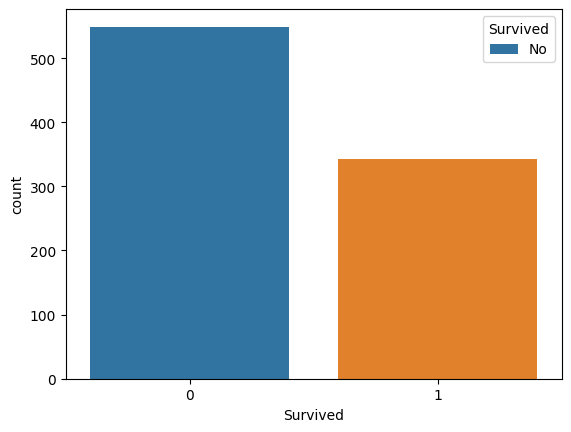

In [42]:
f = sns.countplot(x = train['Survived'])
plt.legend(title = 'Survived', loc = 'upper right', labels = ['No', "Yes"])
plt.show(f)

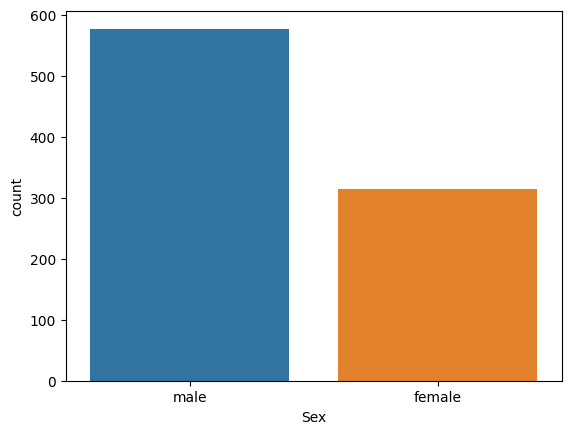

In [43]:
f = sns.countplot(x = train['Sex'])
plt.show(f)

In [44]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)
men = train.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


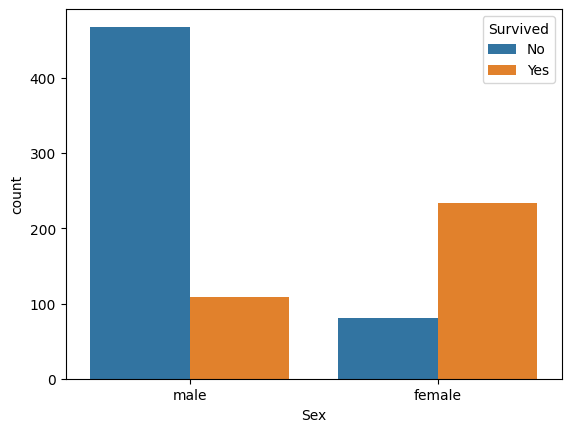

In [45]:
s = sns.countplot(data = train, x = "Sex", hue = "Survived")
plt.legend(title = 'Survived', loc = 'upper right', labels = ['No', 'Yes'])
plt.show(s)

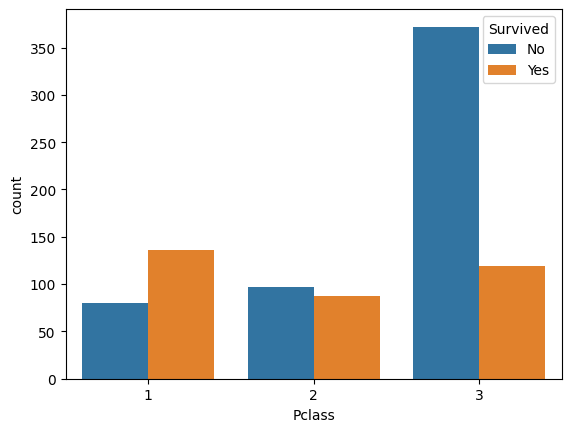

In [46]:
g = sns.countplot(data = train, x = "Pclass", hue = "Survived")
plt.legend(title = 'Survived', loc = 'upper right', labels = ['No', 'Yes'])
plt.show(g)

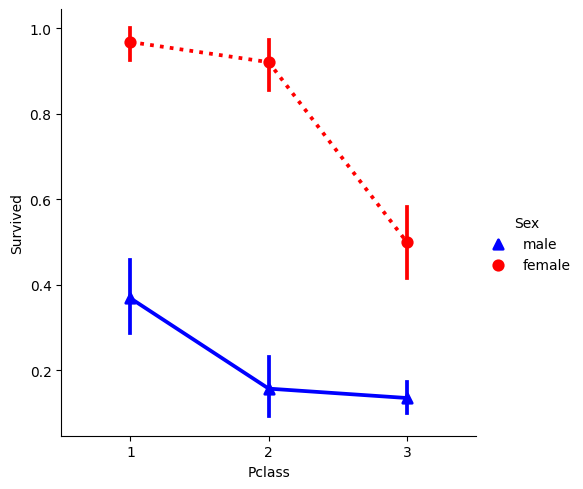

In [47]:
sns.catplot(
    data=train, x="Pclass", y="Survived", hue="Sex",
    palette={"male": "b", "female": "r"},
    markers=["^", "o"], linestyles=["-", ":"],
    kind="point"
)

In [48]:
# Filter the data for women in Pclass 1
women_pclass_1 = train[(train['Sex'] == 'female') & (train['Pclass'] == 1)]

# Calculate the survival rate for women in Pclass 1
survival_rate_women_pclass_1 = women_pclass_1['Survived'].mean()

# Print the survival rate
print("Survival rate of women in Pclass 1:", survival_rate_women_pclass_1)


# Filter the data for men in Pclass 3
men_pclass_3 = train[(train['Sex'] == 'male') & (train['Pclass'] == 3)]

# Calculate the survival rate for men in Pclass 3
survival_rate_men_pclass_3 = men_pclass_3['Survived'].mean()

# Print the survival rate
print("Survival rate of men in Pclass 3:", survival_rate_men_pclass_3)


Survival rate of women in Pclass 1: 0.9680851063829787
Survival rate of men in Pclass 3: 0.13544668587896252


<Axes: xlabel='Age', ylabel='Count'>

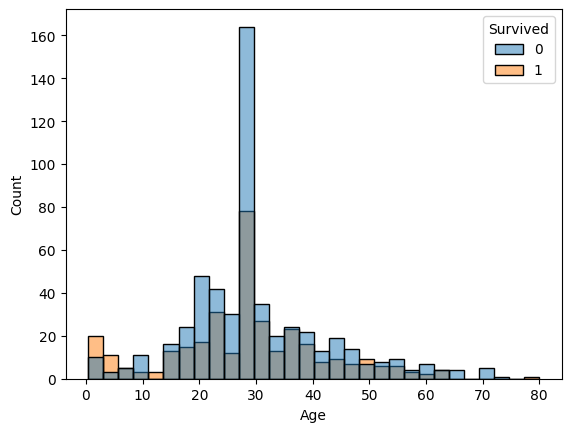

In [49]:
sns.histplot(train, x = 'Age', hue = "Survived")

In [50]:
numeric_columns = train.select_dtypes(include=[np.number])

# # Calculate the correlation matrix
corr = numeric_columns.corr(method='pearson')
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_Number,Family
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.022100,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.095607,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.284016,0.065997
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.100264,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.046942,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.032529,0.783111
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.155371,0.217138
Ticket_Number,-0.022100,-0.095607,0.284016,-0.100264,0.046942,-0.032529,-0.155371,1.000000,0.015832
Family,-0.040143,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,0.015832,1.000000


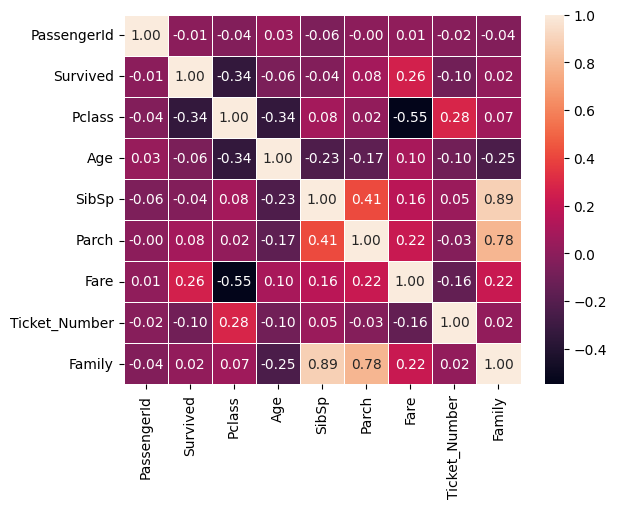

In [51]:
sns.heatmap(corr, annot = True, fmt = ".2f", linewidth = .5)
plt.show()

In [52]:
# train = train.drop(columns=['Cabin'])

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Tick_num', 'Ticket_Number',
       'Name_short', 'Family'],
      dtype='object')

In [53]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_number,Tik_num,Name_short,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,330911,[330911],Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,363272,[363272],Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,240276,[240276],Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,315154,[315154],Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3101298,[3101298],Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,3236,"[A.5., 3236]",Mr,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,17758,"[PC, 17758]",Othera,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,3101262,"[SOTON/O.Q., 3101262]",Mr,1
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,359309,[359309],Mr,1


In [54]:
test['Ticket_Number'] = test['Ticket_number']
test.drop(columns=['Ticket_number'], inplace=True)


In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tik_num,Name_short,Family,Ticket_Number
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,[330911],Mr,1,330911
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,[363272],Mrs,2,363272
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,[240276],Mr,1,240276
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,[315154],Mr,1,315154
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,[3101298],Mrs,3,3101298


In [56]:
y = train['Survived']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ticket_Number', 'Name_short', 'Family']

X = pd.get_dummies(train[features], columns=['Sex', 'Embarked', 'Name_short'], drop_first=True)
X_test = pd.get_dummies(test[features], columns=['Sex', 'Embarked', 'Name_short'], drop_first=True)


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear', random_state = 1, max_iter=1000)
logreg.fit(X,y)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [58]:
y_pred = logreg.predict(X)
print("Accuracy score of Logistic Regression model is ", accuracy_score(y, y_pred)*100, "%")


Accuracy score of Logistic Regression model is  67.34006734006735 %


In [59]:
from sklearn.metrics import classification_report
print("Classification Report: ", classification_report(y,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.68      0.90      0.77       549
           1       0.66      0.31      0.42       342

    accuracy                           0.67       891
   macro avg       0.67      0.61      0.60       891
weighted avg       0.67      0.67      0.64       891



In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
log = LogisticRegression(solver = 'liblinear')
log.fit(X_train, y_train)

print("Accuracy score of valid: ",accuracy_score(y_valid, log.predict(X_valid)))




Accuracy score of valid:  0.664804469273743


## KNN


In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier()

In [62]:
accuracy_knn = knn.score(X,y)
accuracy_knn

0.7878787878787878

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("Accuracy score of valid: ",accuracy_score(y_valid, knn.predict(X_valid)))




Accuracy score of valid:  0.6815642458100558


## Hyperparameter Tuning


In [64]:
# For LogReg

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
c_space = np.logspace(-5, 8, 15)
param_dist = {
    'C': uniform(loc=0, scale=100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
logreg_cv = RandomizedSearchCV(logreg, param_dist, cv=5)
logreg_cv.fit(X,y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Tuned Logistic Regression Parameters: {'C': 1.77395866528135, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 0.8181595631159375


In [65]:
# For KNN

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_neighbors': randint(1, 10),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_cv = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
knn_cv.fit(X,y)

print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNN Parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best score is 0.7205574038039043


## Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=4, max_features='sqrt')
rfc.fit(X,y)

RandomForestClassifier(max_depth=4, random_state=1)

In [78]:
rfc_accuracy_score=accuracy_score(y, rfc.predict(X))
rfc_accuracy_score

0.835016835016835

In [68]:
# RandomizedSearchCV for RFC

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': randint(10, 1000),  # Expand the range for the number of trees
    'max_features': ['auto', 'sqrt', 'log2', None],  # Allow various options for max_features
    'max_depth': randint(1, 50),  # Increase the range for max_depth
    'min_samples_split': randint(2, 50),  # Increase the range for min_samples_split
    'min_samples_leaf': randint(1, 20)  # Experiment with different ranges for min_samples_leaf
}

rfc_cv = RandomizedSearchCV(rfc, param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
rfc_cv.fit(X, y)

print("Tuned RFC Parameters: {}".format(rfc_cv.best_params_))
print("Best score is {}".format(rfc_cv.best_score_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\ishan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

Tuned RFC Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 22, 'n_estimators': 170}
Best score is 0.8249199673592367


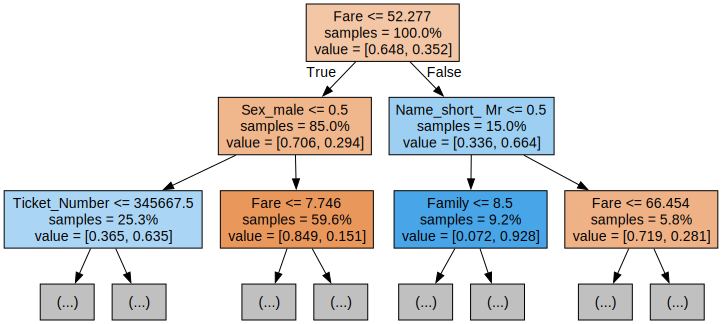

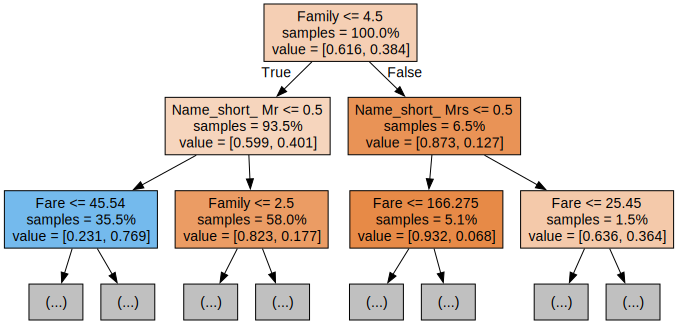

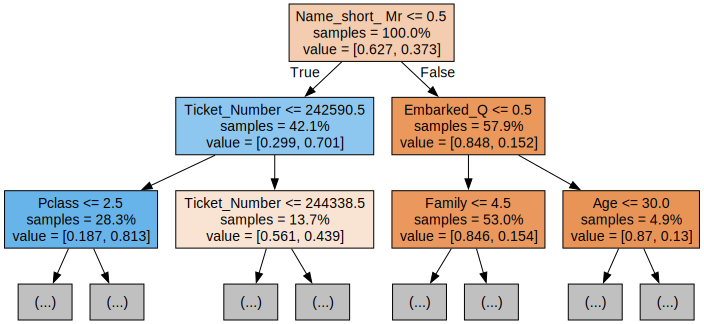

In [69]:
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import graphviz
# Export the first three decision trees from the forest

for i in range(3):
    tree = rfc.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<Axes: >

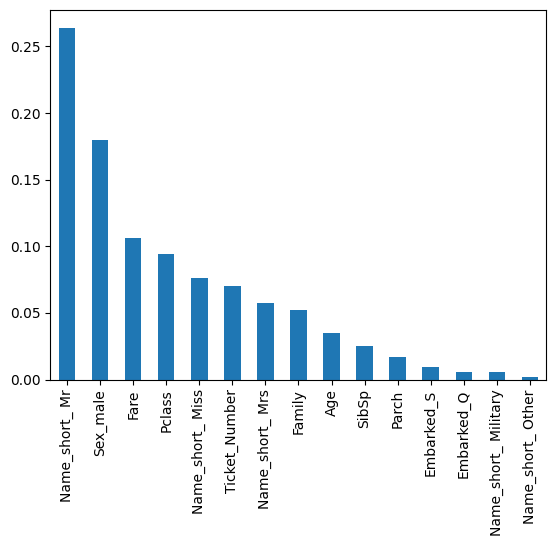

In [70]:
feature_importance = pd.Series(rfc.feature_importances_, index = X.columns).sort_values(ascending=False)
feature_importance.plot.bar()

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=1)

rfc_new = RandomForestClassifier(max_depth= 30, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 22, n_estimators= 170)
rfc_model_new = rfc_new.fit(X_train, y_train)
acc_random_new_forest_train =  accuracy_score(y, rfc_model_new.predict(X))
acc_random_new_forest_train

0.8540965207631874

## ADA Boost Classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ada_model.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [80]:
acc_random_ada_train=accuracy_score(y, ada_model.predict(X))
acc_random_ada_train

0.8709315375982043

In [76]:
# RSCV for ADAboost
param_dist = {
    'n_estimators': randint(50, 200),  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
}
ada_rscv = RandomizedSearchCV(ada_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
ada_rscv.fit(X, y)
accuracy_score(y, ada_rscv.predict(X))

0.8653198653198653

## Final Accuracy Table

In [81]:
all_models = pd.DataFrame({
    'Model': [ "ADA", 'Random Forest Classifier', 'KNN', 'Logistic Regression'],
    'Acc_Score': [ acc_random_ada_train, acc_random_new_forest_train,knn_cv.best_score_, logreg_cv.best_score_]})
result_df = all_models.sort_values(by='Acc_Score', ascending=False)
result_df

,Model,Acc_Score
0,ADA,0.870932
1,Random Forest Classifier,0.854097
3,Logistic Regression,0.818160
2,KNN,0.720557


In [90]:
print("Feature names in X_train:", X_train.columns)
print("Feature names in X_test:", X_test.columns)


Feature names in X_train: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket_Number', 'Family',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Name_short_ Military',
       'Name_short_ Miss', 'Name_short_ Mr', 'Name_short_ Mrs',
       'Name_short_ Other'],
      dtype='object')
Feature names in X_test: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Ticket_Number', 'Family',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Name_short_ Military',
       'Name_short_ Miss', 'Name_short_ Mr', 'Name_short_ Mrs',
       'Name_short_ Other', 'Name_short_ Othera'],
      dtype='object')


In [94]:
predictions = ada_model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
